# Convolutional neural network for image classification

## Importing the libraries

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading the images

In [3]:
path = 'cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

## Train and test set

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('cat_dog_2/training_set',
                                                       target_size= (128, 128),
                                                       batch_size=8,
                                                       class_mode='binary',
                                                       shuffle=True)

Found 4000 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [6]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = training_generator.flow_from_directory('cat_dog_2/test_set',
                                                       target_size= (128, 128),
                                                       batch_size=1,
                                                       class_mode='binary',
                                                       shuffle=False)

Found 1000 images belonging to 2 classes.


In [7]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

## Building and training the neural network

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=14401, activation='relu'))
model.add(Dense(units=14401, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 14401)             4

In [10]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_dataset, epochs=10)

Epoch 1/10


<ipython-input-11-ad6167301974>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset, epochs=10)


500/500 [==============================] - 83s 146ms/step - loss: 1.3291 - accuracy: 0.5485
Epoch 2/10
500/500 [==============================] - 73s 147ms/step - loss: 0.6836 - accuracy: 0.5730
Epoch 3/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6663 - accuracy: 0.6022
Epoch 4/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6851 - accuracy: 0.6000
Epoch 5/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6762 - accuracy: 0.5957
Epoch 6/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6616 - accuracy: 0.6020
Epoch 7/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6702 - accuracy: 0.6053
Epoch 8/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6557 - accuracy: 0.6225
Epoch 9/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6469 - accuracy: 0.6177
Epoch 10/10
500/500 [==============================] - 73s 146ms/step - loss: 0.6471

## Evaluating the neural network

In [12]:
predictions = model.predict(test_dataset)
predictions

1000/1000 [==============================] - 12s 12ms/step


array([[0.38702095],
       [0.59652126],
       [0.38474968],
       [0.5071045 ],
       [0.76456076],
       [0.35934412],
       [0.46513224],
       [0.4969545 ],
       [0.38951805],
       [0.01149807],
       [0.56371945],
       [0.59663457],
       [0.1989685 ],
       [0.10483294],
       [0.52463776],
       [0.78761625],
       [0.6063691 ],
       [0.629407  ],
       [0.28952697],
       [0.47990143],
       [0.45856965],
       [0.271912  ],
       [0.58461046],
       [0.44768038],
       [0.3807953 ],
       [0.66326   ],
       [0.32690734],
       [0.28318274],
       [0.25538787],
       [0.63714826],
       [0.3765861 ],
       [0.53392315],
       [0.505633  ],
       [0.59382147],
       [0.62554014],
       [0.64092183],
       [0.44537306],
       [0.5217657 ],
       [0.38947076],
       [0.39723912],
       [0.5272899 ],
       [0.54044294],
       [0.29643616],
       [0.4344891 ],
       [0.45527008],
       [0.3129423 ],
       [0.55352765],
       [0.597

In [13]:
predictions = np.argmax(predictions, axis=1)

In [14]:
accuracy_score(test_dataset.classes, predictions)

0.5

In [15]:
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[500,   0],
       [500,   0]])

<Axes: >

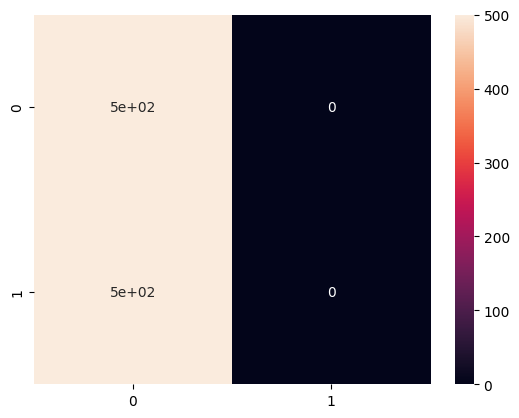

In [16]:
sns.heatmap(cm, annot=True)

In [17]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
